In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit import *
from qiskit.tools.visualization import plot_histogram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
myList = [i for i in range(0, 20)]
np.random.shuffle(myList)
myList

[0, 11, 19, 3, 4, 17, 15, 6, 1, 16, 2, 14, 7, 5, 12, 9, 18, 8, 10, 13]

In [3]:
import random

wantedNumber = random.randint(0, 20)

def oracle(number):
    if number == wantedNumber:
        response = True
    else:
        response = False
    return response

In [4]:
for index, number in enumerate(myList):
    if oracle(number) is True:
        print(f"{wantedNumber} number in index: {index}")
        print(f"execution count: {index + 1}")
        break

6 number in index: 7
execution count: 8


In [5]:
# Quantum
# Wanted 11

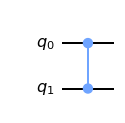

In [6]:
oracleCircuit = QuantumCircuit(2,name="oracleCircuit")

oracleCircuit.cz(0, 1)
oracleCircuit.to_gate()
oracleCircuit.draw()

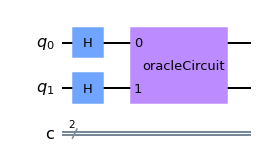

In [7]:
mainCircuit = QuantumCircuit(2, 2)
mainCircuit.h([0, 1])
mainCircuit.append(oracleCircuit, [0,1])
mainCircuit.draw()

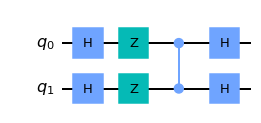

In [8]:
reflectionCircuit = QuantumCircuit(2, name="reflectionCircuit")

reflectionCircuit.h([0, 1])
reflectionCircuit.z([0, 1])
reflectionCircuit.cz(0, 1)
reflectionCircuit.h([0, 1])

reflectionCircuit.to_gate()
reflectionCircuit.draw()

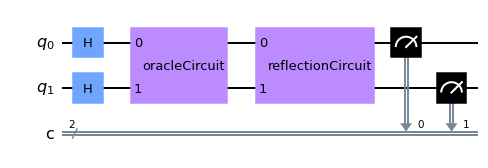

In [10]:
mainCircuit.append(reflectionCircuit, [0, 1])
mainCircuit.measure([0, 1], [0, 1])
mainCircuit.draw()

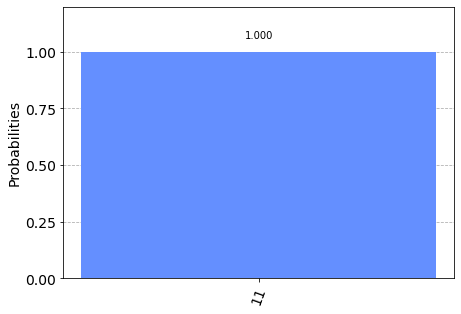

In [11]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(mainCircuit, backend=simulator, shots=1024).result()
plot_histogram([result.get_counts(mainCircuit)])

In [12]:
# Dinner Party - Using Aqua

In [14]:
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle

In [21]:
logicalExpressions = '((Tom & Jerry) | (Bob & James)) & ~(Jerry & James)'

In [22]:
groverAlgorithm = Grover(LogicalExpressionOracle(logicalExpressions))

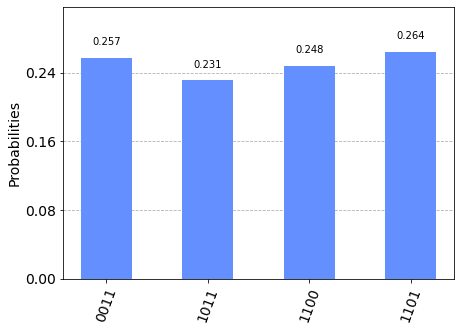

In [24]:
simulator = Aer.get_backend("qasm_simulator")
result = groverAlgorithm.run(simulator)
plot_histogram(result["measurement"])
# q0 = Bob q1 = James q2 = Jerry q3 = Tom